In [164]:
import pandas as pd
from fbprophet import Prophet

In [165]:
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pytz import timezone as tz

In [166]:
from time import time
from datetime import date
from datetime import datetime

In [167]:
df_energy = pd.read_csv('../data/energy/'+ "eco2mix-regional-cons-def.csv", sep=";",
                parse_dates=["Date - Heure"]).sort_values(by=["Région", "Date - Heure"])

In [169]:
df_energy = df_energy[["Région", "Date - Heure", "Consommation (MW)"]]

In [172]:
df_energy.fillna(df_energy.dropna()["Consommation (MW)"].mean(), inplace=True)

In [174]:
df_energy.isnull().sum()

Région               0
Date - Heure         0
Consommation (MW)    0
dtype: int64

In [180]:
df_energy.head()

,Région,Date - Heure,Consommation (MW)
147167,Auvergne-Rhône-Alpes,2013-01-01 00:00:00+01:00,4528.493194
147170,Auvergne-Rhône-Alpes,2013-01-01 00:30:00+01:00,8173.000000
1017843,Auvergne-Rhône-Alpes,2013-01-01 01:00:00+01:00,7944.000000
147173,Auvergne-Rhône-Alpes,2013-01-01 01:30:00+01:00,7896.000000
1017845,Auvergne-Rhône-Alpes,2013-01-01 02:00:00+01:00,7882.000000


In [181]:
df_energy["date"] = df_energy["Date - Heure"].apply(lambda x: x.date())

In [182]:
df_energy.head()

,Région,Date - Heure,Consommation (MW),date
147167,Auvergne-Rhône-Alpes,2013-01-01 00:00:00+01:00,4528.493194,2013-01-01
147170,Auvergne-Rhône-Alpes,2013-01-01 00:30:00+01:00,8173.000000,2013-01-01
1017843,Auvergne-Rhône-Alpes,2013-01-01 01:00:00+01:00,7944.000000,2013-01-01
147173,Auvergne-Rhône-Alpes,2013-01-01 01:30:00+01:00,7896.000000,2013-01-01
1017845,Auvergne-Rhône-Alpes,2013-01-01 02:00:00+01:00,7882.000000,2013-01-01


In [187]:
# group by day:
df_region_per_day = df_energy.groupby(["Région", "date"], as_index=False).agg({"Consommation (MW)": np.sum})

In [189]:
df_region_per_day.head()

,Région,date,Consommation (MW)
0,Auvergne-Rhône-Alpes,2013-01-01,359887.493194
1,Auvergne-Rhône-Alpes,2013-01-02,417636.000000
2,Auvergne-Rhône-Alpes,2013-01-03,449620.000000
3,Auvergne-Rhône-Alpes,2013-01-04,438413.000000
4,Auvergne-Rhône-Alpes,2013-01-05,397587.000000


In [190]:
df_region_per_day.Région.unique()

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand-Est', 'Hauts-de-France',
       'Ile-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur"], dtype=object)

In [191]:
df_region_per_day_ile_de_france = df_region_per_day[df_region_per_day['Région']=='Ile-de-France']

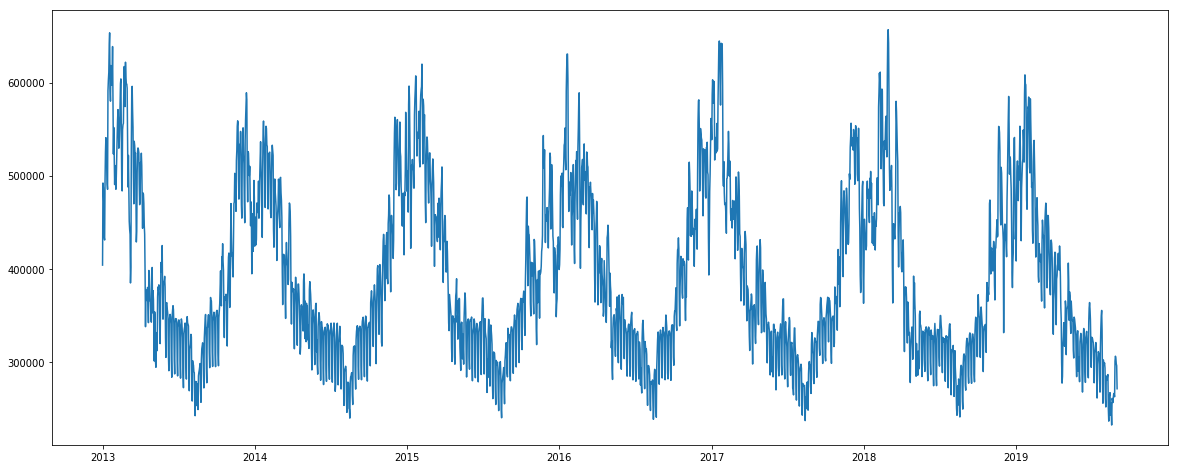

In [197]:
plt.figure(figsize=(20,8))
plt.plot(df_region_per_day_ile_de_france["date"], df_region_per_day_ile_de_france["Consommation (MW)"])

# Prophet for forcasting Ile de France energy

### 1) Ile de France only 2 years ( 2017/2018/2019)

In [202]:
df_region_per_day_ile_de_france.dtypes

Région                       object
date                         object
Consommation (MW)           float64
date_time            datetime64[ns]
dtype: object

In [201]:
df_region_per_day_ile_de_france['date_time']=pd.to_datetime(df_region_per_day_ile_de_france['date'], format='%Y-%m-%d')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
df_region_per_day_ile_de_france.head()

,Région,date,Consommation (MW),date_time
14604,Ile-de-France,2013-01-01,403920.493194,2013-01-01
14605,Ile-de-France,2013-01-02,492157.000000,2013-01-02
14606,Ile-de-France,2013-01-03,487111.000000,2013-01-03
14607,Ile-de-France,2013-01-04,470053.000000,2013-01-04
14608,Ile-de-France,2013-01-05,433732.000000,2013-01-05


In [248]:
# approche par jour:
df_region_per_day_ile_de_france_2017_2018 = df_region_per_day_ile_de_france[(df_region_per_day_ile_de_france['date_time']>='2017-01-01') 
                                                                              &(df_region_per_day_ile_de_france['date_time']<='2019-01-01')]



In [249]:
df_region_per_day_ile_de_france_2017_2018.head()

,Région,date,Consommation (MW),date_time
16065,Ile-de-France,2017-01-01,538676.0,2017-01-01
16066,Ile-de-France,2017-01-02,587121.0,2017-01-02
16067,Ile-de-France,2017-01-03,603003.0,2017-01-03
16068,Ile-de-France,2017-01-04,589437.0,2017-01-04
16069,Ile-de-France,2017-01-05,577904.0,2017-01-05


In [250]:
df_region_per_day_ile_de_france_2017_2018.tail()

,Région,date,Consommation (MW),date_time
16791,Ile-de-France,2018-12-28,541076.0,2018-12-28
16792,Ile-de-France,2018-12-29,485436.0,2018-12-29
16793,Ile-de-France,2018-12-30,431795.0,2018-12-30
16794,Ile-de-France,2018-12-31,442356.0,2018-12-31
16795,Ile-de-France,2019-01-01,408325.0,2019-01-01


In [251]:
model_energy = Prophet()

In [253]:
df_region_per_day_ile_de_france_2017_2018.rename(columns={"date_time": "ds"}, inplace=True)
df_region_per_day_ile_de_france_2017_2018.rename(columns={"Consommation (MW)": "y"}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
df_prophet_2017_2018 = df_region_per_day_ile_de_france_2017_2018[['ds','y']]

In [266]:
df_prophet_2017_2018.tail()

,ds,y
16791,2018-12-28,541076.0
16792,2018-12-29,485436.0
16793,2018-12-30,431795.0
16794,2018-12-31,442356.0
16795,2019-01-01,408325.0


In [255]:
start_time = time()
model_energy.fit(df_prophet_2017_2018)
end_time = time()
print ("This took %.2f seconds" % (end_time - start_time))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



This took 0.26 seconds


In [256]:
future_ile_de_france_energy_2019 = model_energy.make_future_dataframe(periods=365, include_history = True)


In [257]:
future_energy_forcast_ile_de_france_2019 = model_energy.predict(future_ile_de_france_energy_2019)

In [258]:
future_energy_forcast_ile_de_france_2019[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,493957.182204,448202.989280,536319.131927
1,2017-01-02,539446.654257,494075.338015,581779.678980
2,2017-01-03,547552.802730,501100.720497,591822.972471
3,2017-01-04,549190.610813,503182.567928,590653.822024
4,2017-01-05,545729.080443,499997.762847,586695.636608
5,2017-01-06,542250.698480,500282.185012,585058.047522
6,2017-01-07,510443.851550,467710.434195,555432.023495
7,2017-01-08,497573.233279,456110.543772,544551.702880
8,2017-01-09,544894.979162,501913.154098,590423.481389
9,2017-01-10,554485.151603,508607.508848,596883.375459


In [267]:
future_energy_forcast_ile_de_france_2019_cut = future_energy_forcast_ile_de_france_2019[future_energy_forcast_ile_de_france_2019['ds']<='2019-01-01']

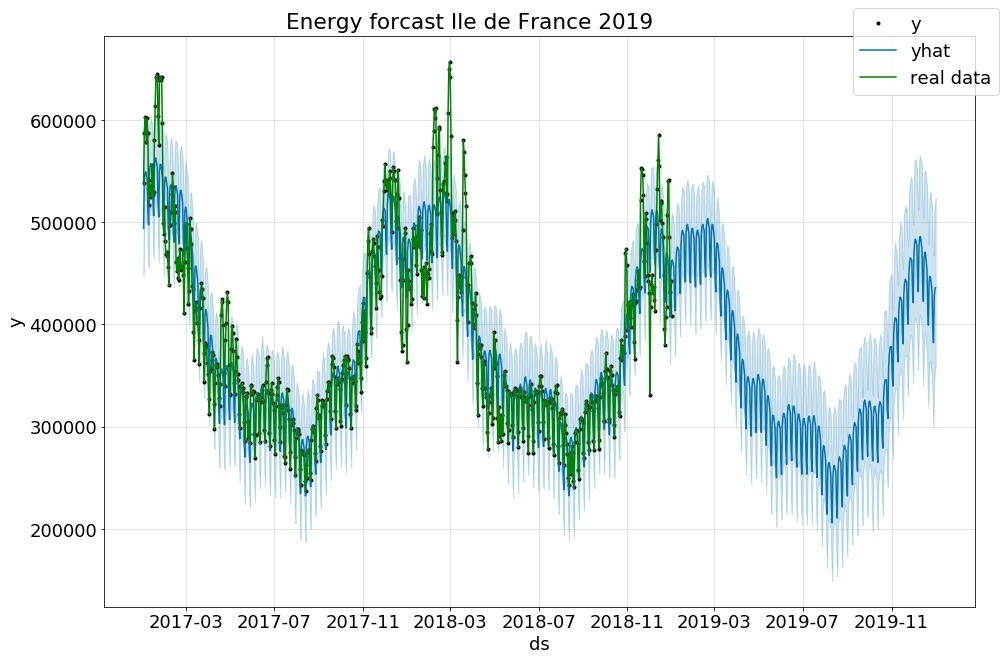

In [259]:
matplotlib.rcParams.update({'font.size': 18})
fig1 = model_energy.plot(future_energy_forcast_ile_de_france_2019, uncertainty=True)
plt.plot(df_region_per_day_ile_de_france_2017_2018.ds,df_regionon_per_day_ile_de_france_2017_2018.y,color='green',label='real data')
fig1.set_size_inches(15,10,forward=True)
fig1.suptitle('Energy forcast Ile de France 2019')
fig1.legend()


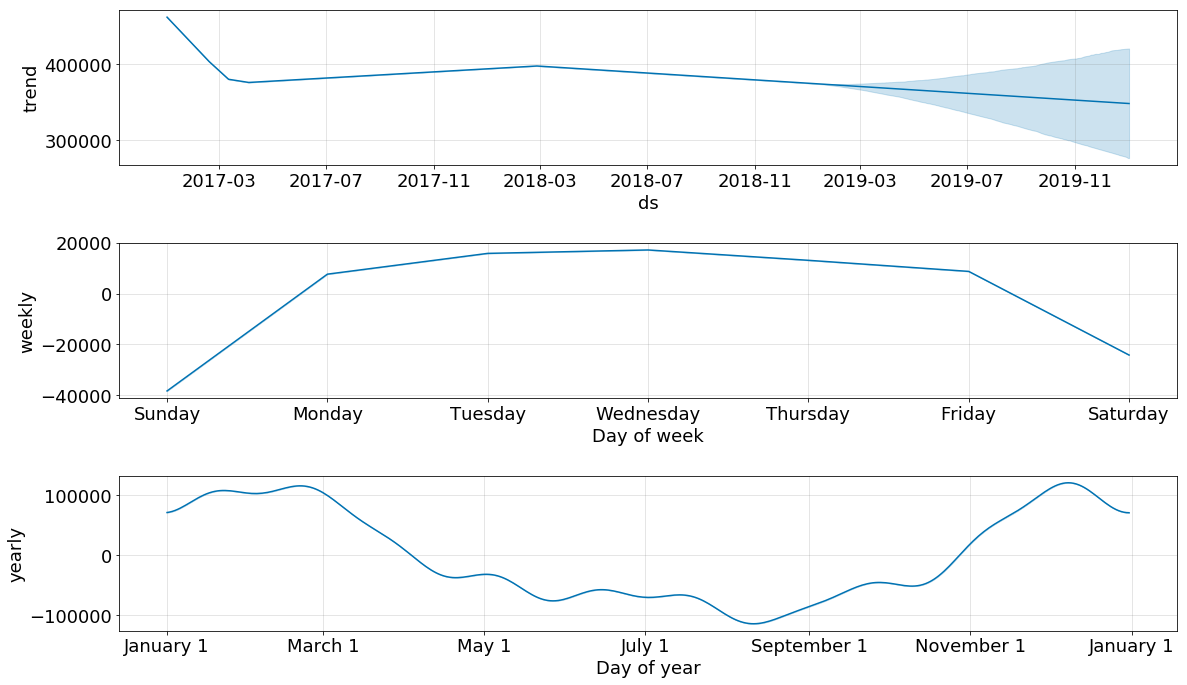

In [262]:
fig2 = model_energy.plot_components(future_energy_forcast_ile_de_france_2019)
fig2.set_size_inches(20,10,forward=True)

In [265]:
future_energy_forcast_ile_de_france_2019.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,461457.422299,448202.989280,536319.131927,461457.422299,461457.422299,32499.759906,32499.759906,32499.759906,-38304.682730,-38304.682730,-38304.682730,70804.442636,70804.442636,70804.442636,0.0,0.0,0.0,493957.182204
1,2017-01-02,460239.593301,494075.338015,581779.678980,460239.593301,460239.593301,79207.060955,79207.060955,79207.060955,7648.708701,7648.708701,7648.708701,71558.352254,71558.352254,71558.352254,0.0,0.0,0.0,539446.654257
2,2017-01-03,459021.764304,501100.720497,591822.972471,459021.764304,459021.764304,88531.038426,88531.038426,88531.038426,15823.566122,15823.566122,15823.566122,72707.472304,72707.472304,72707.472304,0.0,0.0,0.0,547552.802730
3,2017-01-04,457803.935307,503182.567928,590653.822024,457803.935307,457803.935307,91386.675506,91386.675506,91386.675506,17169.426795,17169.426795,17169.426795,74217.248711,74217.248711,74217.248711,0.0,0.0,0.0,549190.610813
4,2017-01-05,456586.106310,499997.762847,586695.636608,456586.106310,456586.106310,89142.974133,89142.974133,89142.974133,13097.041305,13097.041305,13097.041305,76045.932828,76045.932828,76045.932828,0.0,0.0,0.0,545729.080443


In [263]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [268]:
mean_absolute_error(df_regionon_per_day_ile_de_france_2017_2018.y, future_energy_forcast_ile_de_france_2019_cut.yhat)

23817.502968279678

In [269]:
mean_squared_error(df_regionon_per_day_ile_de_france_2017_2018.y, future_energy_forcast_ile_de_france_2019_cut.yhat)

1152425371.9663558

In [272]:
df_regionon_per_day_ile_de_france_2017_2018.head()

,Région,date,y,ds
16065,Ile-de-France,2017-01-01,538676.0,2017-01-01
16066,Ile-de-France,2017-01-02,587121.0,2017-01-02
16067,Ile-de-France,2017-01-03,603003.0,2017-01-03
16068,Ile-de-France,2017-01-04,589437.0,2017-01-04
16069,Ile-de-France,2017-01-05,577904.0,2017-01-05


In [273]:
future_energy_forcast_ile_de_france_2019_cut.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,461457.422299,448202.989280,536319.131927,461457.422299,461457.422299,32499.759906,32499.759906,32499.759906,-38304.682730,-38304.682730,-38304.682730,70804.442636,70804.442636,70804.442636,0.0,0.0,0.0,493957.182204
1,2017-01-02,460239.593301,494075.338015,581779.678980,460239.593301,460239.593301,79207.060955,79207.060955,79207.060955,7648.708701,7648.708701,7648.708701,71558.352254,71558.352254,71558.352254,0.0,0.0,0.0,539446.654257
2,2017-01-03,459021.764304,501100.720497,591822.972471,459021.764304,459021.764304,88531.038426,88531.038426,88531.038426,15823.566122,15823.566122,15823.566122,72707.472304,72707.472304,72707.472304,0.0,0.0,0.0,547552.802730
3,2017-01-04,457803.935307,503182.567928,590653.822024,457803.935307,457803.935307,91386.675506,91386.675506,91386.675506,17169.426795,17169.426795,17169.426795,74217.248711,74217.248711,74217.248711,0.0,0.0,0.0,549190.610813
4,2017-01-05,456586.106310,499997.762847,586695.636608,456586.106310,456586.106310,89142.974133,89142.974133,89142.974133,13097.041305,13097.041305,13097.041305,76045.932828,76045.932828,76045.932828,0.0,0.0,0.0,545729.080443
